In [2]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

import numpy as np
import matplotlib.pyplot as plt

In [42]:
import tensorflow_datasets as tfds

In [44]:
train_data, test_data = tfds.load('horses_or_humans', split=['train', 'test'], as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteINSZ5U/horses_or_humans-train.tfrecord*..…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteINSZ5U/horses_or_humans-test.tfrecord*...…

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


In [3]:
model = keras.applications.VGG19()

574710816/574710816 [==============================] - 20s 0us/step


In [4]:
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [24]:
outputs = []

for layer in model.layers:
  print(layer.name)

  if 'conv' in layer.name:
    outputs.append(layer.output)

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool
flatten
fc1
fc2
predictions


In [25]:
model_input = model.layers[0]

In [26]:
 log_model = keras.Model(inputs=model_input.input, outputs=outputs)

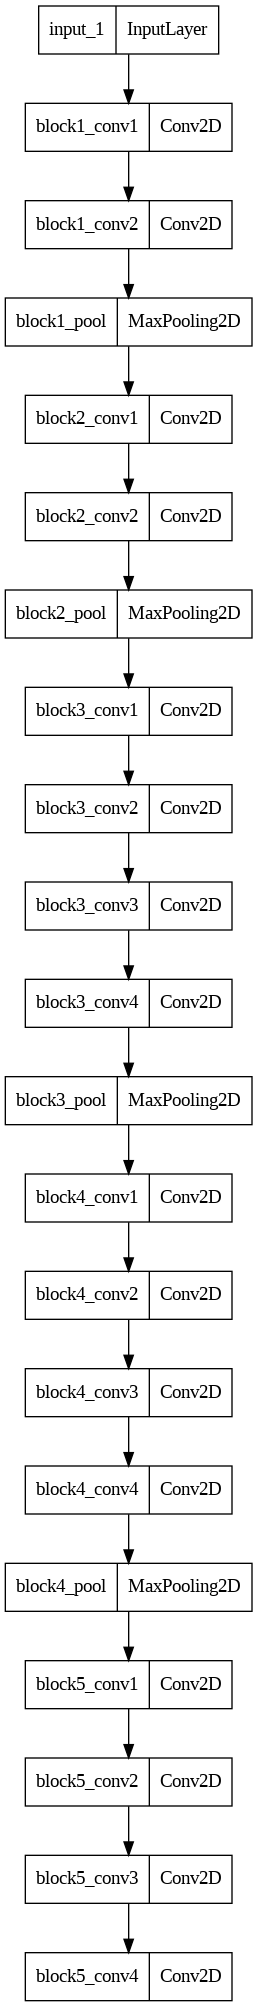

In [64]:
keras.utils.plot_model(log_model)

In [27]:
log_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [28]:
fake_input = tf.zeros((1, 224, 224, 3))

log_outputs = log_model(fake_input)

In [29]:
len(log_outputs)

16

In [30]:
len(outputs)

16

In [32]:
log_outputs[0].shape

TensorShape([1, 224, 224, 64])

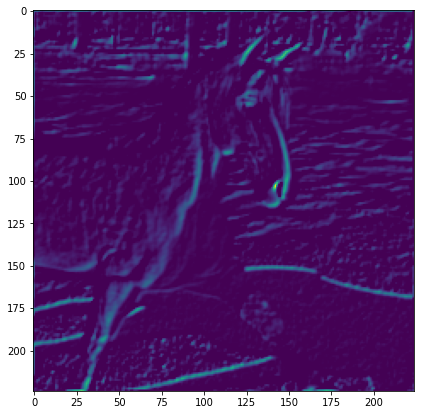

In [73]:
fig, ax = plt.subplots(figsize=(7, 7))

layer_num = 0
sample_num = 0
filter_num = 0
plt.imshow(log_outputs[layer_num][sample_num, :, :, filter_num])
plt.show()

In [38]:
log_outputs[0][0, :, :, 0].shape

TensorShape([224, 224])

In [47]:
def preprocess(img, label):
  img = tf.image.resize(img, [224, 224])
  img = keras.applications.vgg19.preprocess_input(img)
  return img, label

In [48]:
batch_size = 16

train_data = train_data.map(preprocess).batch(batch_size)
test_data = test_data.map(preprocess).batch(batch_size)

In [58]:
for x, y in train_data:
  print(x.shape)

  img = x[0, :, :, :]
  break

(16, 224, 224, 3)


In [59]:
img.shape

TensorShape([224, 224, 3])

In [75]:
batch_input = tf.expand_dims(img, axis=0)
log_outputs = log_model(batch_input)

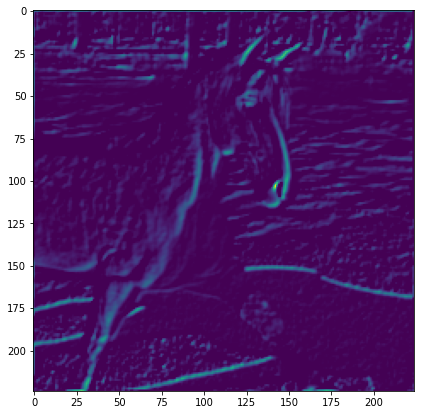

In [86]:
fig, ax = plt.subplots(figsize=(7, 7))

layer_num = 0
sample_num = 0
filter_num = 0
plt.imshow(log_outputs[layer_num][sample_num, :, :, filter_num])
plt.show()